# Julia Prerequisites (v.1.4)

This notebook serves as a preamble to the other two notebooks found in this repository. By following it you will learn all the Julia you will need in order to understand them. This notebook assumes some prior exposure and  practical experience with programming languages used in numerical computing like Matlab, Python, Octave, Mathematica, or others.

# Operators and Variables

All the usual operators are defined in Julia similarly with other languages

In [1]:
println(1 + 1)
println(1 - 1)
println(2 * 5)
println(1 / 5)
println(2 ^ 3)

2
0
10
0.2
8


Variable assignment is also very similar

In [2]:
a = 2 # notive that in the Jupyter Notebook environment the last value that is returned is printed automatically

2

In [3]:
a = b = 2
a = 3
println("$a, $b") # a and b are seperate variables

3, 2


In [4]:
# if we want a value to not be returned we can use the semicolon (;)
c = 2;

# Functions

There are three ways to define a function in Julia.  

In [5]:
# the quick way
f(x, y) = (x + y) ^ 2

f (generic function with 1 method)

In [6]:
f(2,3)

25

In [7]:
# second way, use this if you have a lot of code inside a function
function g(x, y)
    (x + y) ^ 2 # last value is returned automatically
end

g (generic function with 1 method)

In [8]:
g(2, 3)

25

In [9]:
# the anonymous way, this is mostly used as arguments to other functions, 
# e.g. the filter function https://docs.julialang.org/en/v1/base/collections/#Base.filter
anonym_function = (x, y) -> (x + y) ^ 2

#3 (generic function with 1 method)

In [10]:
anonym_function(2, 3)

25

Note: An exclamation mark (!) at the end of a function's name indicates that the function operates **in-place**. This means that the arguments passed are altered directly instead of altering a copy and returning it.

## The Let syntax

The Let syntax allows creating a local environment in which all values inside it are local. It is mostly used when running experiments with different parameters. By using it you can be sure that you are using the correct values and not some values defined elsewhere in the notebook.

In [11]:
let a = 1, b = 2, f = x->x^2 # these variables are only defined inside this block
    f(a + b) # we can do as many operations as we want here, all variables created will be local
end

9

In [12]:
f # f is not defined

f (generic function with 1 method)

In [13]:
# let also let's (ha) us return value and assign it directly to a variable.
s = let (x1, x2) = [5, 7], (y1, y2) = [3, 2]
    distance = (x1 - x2)^2 + (y1 + y2)^2
    distance
end

29

In [14]:
s # is defined because it was created in global context

29

## Splatting Syntax

In Julia the dot-dot-dot (...) operator is called "splatting". It allows as to unpack a collection into seperate arguments when calling a function.

In [15]:
splat_example(a,b,c) = a * b * c

splat_example (generic function with 1 method)

In [16]:
args = [1,2,5]
splat_example(args...) # the values of "args" are unpacked and passed as individual arguments to splat_example

10

In [17]:
values... # splatting only works when calling function

ErrorException: syntax: "..." expression outside call

# Arrays and Matrices

Array, lists and matrices are structures that always confuse newcomers to Julia, so it is important to get the names clear from the start.  
Arrays can be n dimensional with 1d arrays being the equivalent of "lists" and 2d arrays being matrices.

In [18]:
# creating our first list
a = [1, 2, 3] # remember, last value is returned automatically, use semicolon if you don't want that

3-element Array{Int64,1}:
 1
 2
 3

In [19]:
# adding to an array
push!(a, 4)

4-element Array{Int64,1}:
 1
 2
 3
 4

In [20]:
hcat(a) # converts a 1d array to 2d by stacking its arguments horizontally (side by side) into columns

4×1 Array{Int64,2}:
 1
 2
 3
 4

In [21]:
# creating a 2d array
b = [1 2 3] # by putting a space instead of a comma in-between the numbers we can create a row of a 2d array

1×3 Array{Int64,2}:
 1  2  3

In [22]:
vec(b) # converts a 2d array to 1d

3-element Array{Int64,1}:
 1
 2
 3

In [23]:
# 2 x 2 array
c = [1 2; 3 4] # by putting a semicolon in the brackets we can stack vertically 2 or more rows to create a multirow 2d array

2×2 Array{Int64,2}:
 1  2
 3  4

In [24]:
vcat(c, [5 6]) # append row to matrix via horizontal concatination

3×2 Array{Int64,2}:
 1  2
 3  4
 5  6

In [25]:
[c; 5 6] # append row to matrix using the semicolon syntax

3×2 Array{Int64,2}:
 1  2
 3  4
 5  6

## Indexing

In Julia indexes start from 1. Let's see some examples.

In [26]:
c = [1 2; 3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

In [27]:
c[1,2] # first row, second column

2

In [28]:
c[:,1] # all rows, first column

2-element Array{Int64,1}:
 1
 3

# Broadcasting - Vectorized operations

In Julia the dot (.) broadcasts a function to each element in a collection (any array-like structure).

In [29]:
a = [1,2,3] # generates 3 random numbers from a uniform 0-1 distribution
b = [1,2,3]
c = a .* b

3-element Array{Int64,1}:
 1
 4
 9

In [30]:
# the above code is similar to the following loop
c = zeros(Int64, 3) # array of size 3 filled with 0s of type Int64
for i in eachindex(a) # or eachindex(b), eachindex returns a range from 1 to the length of the collection
    c[i] = a[i] * b[i]
end
c

3-element Array{Int64,1}:
 1
 4
 9

In [31]:
# broadcasting is also very usefull for broadcasting functions
a = b = zeros(10)
length.([a,b])

2-element Array{Int64,1}:
 10
 10

In [32]:
a = [1,2,3]
exp.(a)

3-element Array{Float64,1}:
  2.718281828459045
  7.38905609893065
 20.085536923187668

In [33]:
a = [1,2,3]
2 .^ a

3-element Array{Int64,1}:
 2
 4
 8

## The broadcasting macro

The broadcasting macro @. broadcasts every function and operator to the right of it. It is used instead of multiple broadcast operators, it makes the code look cleaner and more understandable.

In [34]:
a = @. sin(2pi * (1:5))

5-element Array{Float64,1}:
 -2.4492935982947064e-16
 -4.898587196589413e-16
 -7.347880794884119e-16
 -9.797174393178826e-16
 -1.2246467991473533e-15

In [35]:
# the expression above is equivalent to the following loop
a = zeros(5)
for i in 1:5
    a[i] = sin(2pi * i)
end
a

5-element Array{Float64,1}:
 -2.4492935982947064e-16
 -4.898587196589413e-16
 -7.347880794884119e-16
 -9.797174393178826e-16
 -1.2246467991473533e-15

# The Pipe operator

The piper operator is incredibly useful in Julia, it allows us to apply a function to an output of a previous one with very little effort.

In [36]:
rand(10) |> sum

4.193791553599252

In [37]:
# the above cell is equivalent to 
sum(rand(10))

6.21122742665918

In [38]:
# not only that but the Pipe operator can be combined with the broadcasting operator
a = b = zeros(10)
[a,b] .|> length

2-element Array{Int64,1}:
 10
 10

# Ranges

In Julia ranges are created with the colon (:) operator

In [39]:
1:5

1:5

In [40]:
# the collect function takes a range and returns the collected values
collect(1:5)

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

In [41]:
# you can also add a step 
1:2:10 |> collect

5-element Array{Int64,1}:
 1
 3
 5
 7
 9

In [42]:
# for more complex ranges we make use of the range function
range(0, step = 0.25, length = 5)

0.0:0.25:1.0

In [43]:
range(0, step = 0.25, length = 5) |> collect

5-element Array{Float64,1}:
 0.0
 0.25
 0.5
 0.75
 1.0

# Plots and Packages

Julia has a very simple to use and efficient packaging system. To import a package into the workspace we use the keyword "using".

In [44]:
using LinearAlgebra

In [45]:
# to add a new package first import the Pkg package
using Pkg
# then we will make use of Pkg's functions to add the DataFrames package
Pkg.add("DataFrames")

   Updating registry at `~/.julia/registries/General`
  Resolving package versions...
   Updating `~/workspace/University/H_Examhno/karydis/erg3/Project.toml`
 [no changes]
   Updating `~/workspace/University/H_Examhno/karydis/erg3/Manifest.toml`
 [no changes]


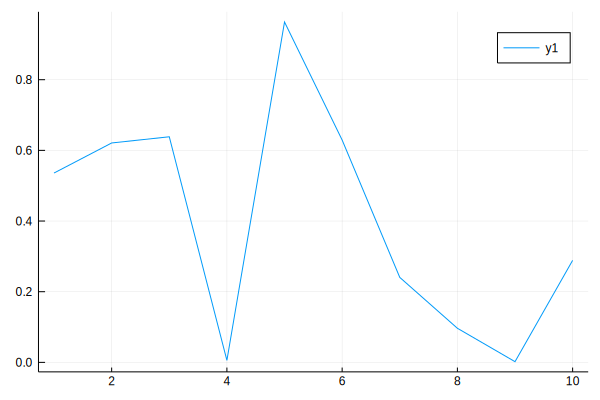

In [46]:
using Plots # import the plots package

a = rand(10)
plot(a) # plot a line of random numbers

More usage information on the plots package can be found on the plots documentation https://docs.juliaplots.org/